# Assignment

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime_data = pd.read_csv("crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
crime_data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
crime_data.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [10]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [12]:
crime_data.shape

(50, 5)

In [13]:
crime_data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [14]:
crime_data[crime_data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


In [17]:
crime_data1 = crime_data.drop(['States'],axis=1)

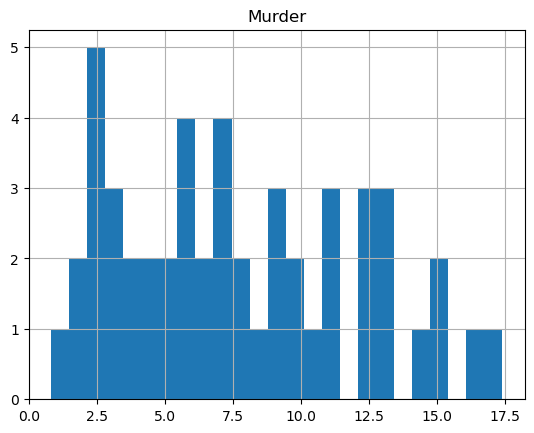

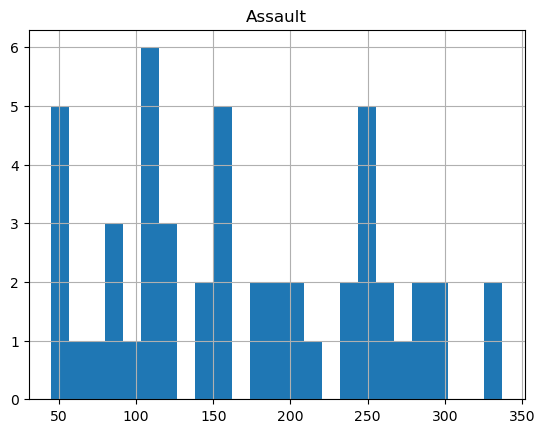

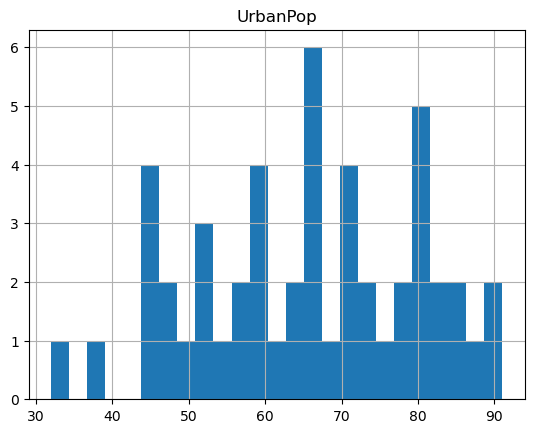

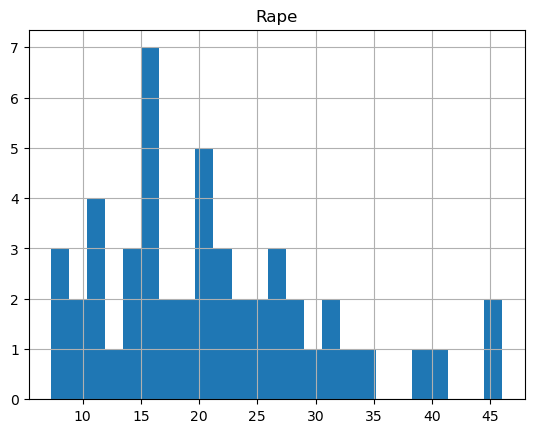

In [19]:
#Creating histograms to understand the distribution
for feature in crime_data1.columns:
    crime_data1[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

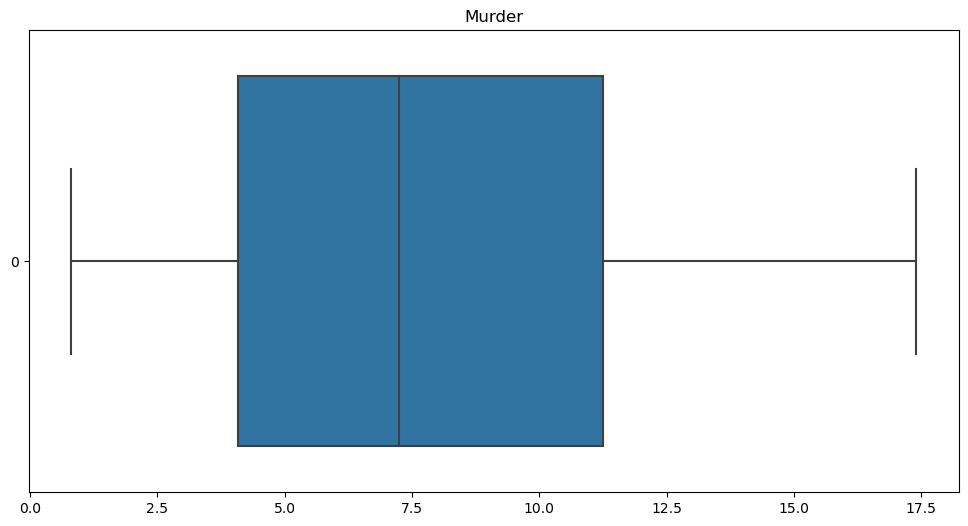

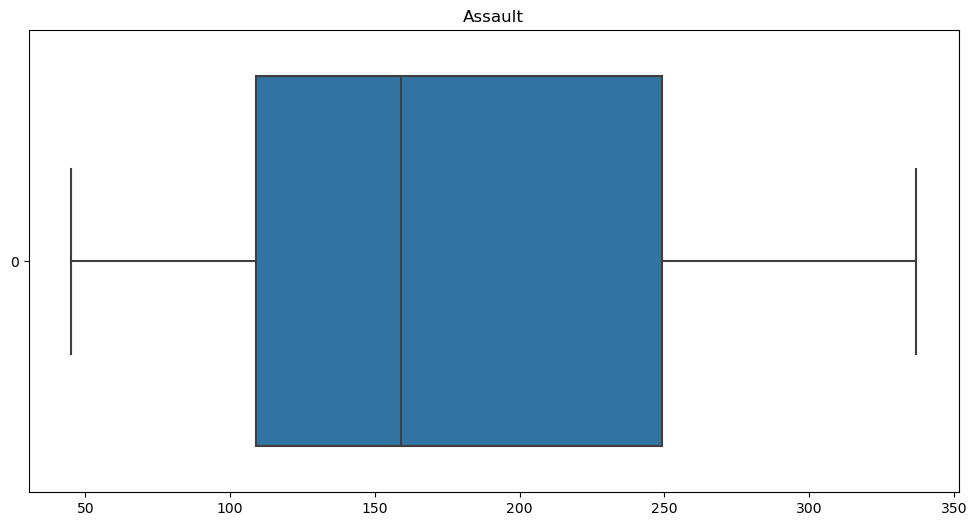

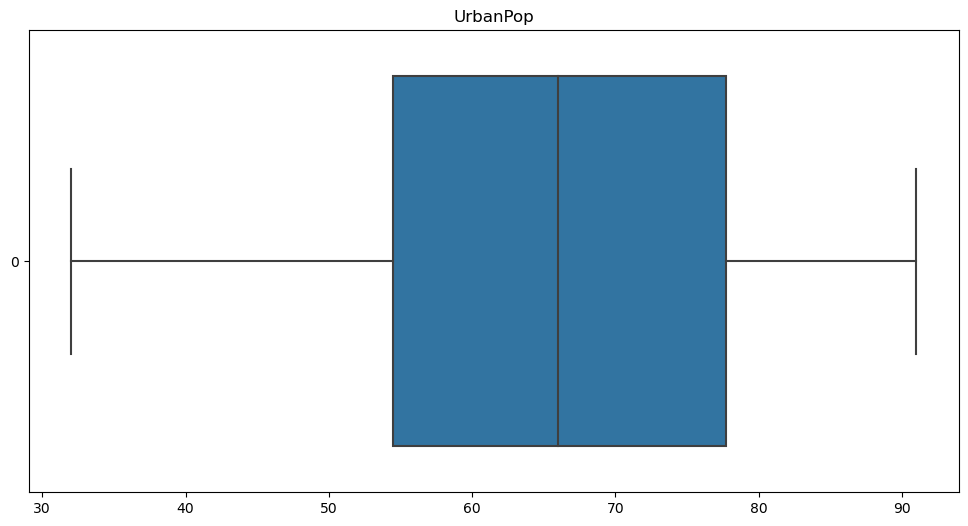

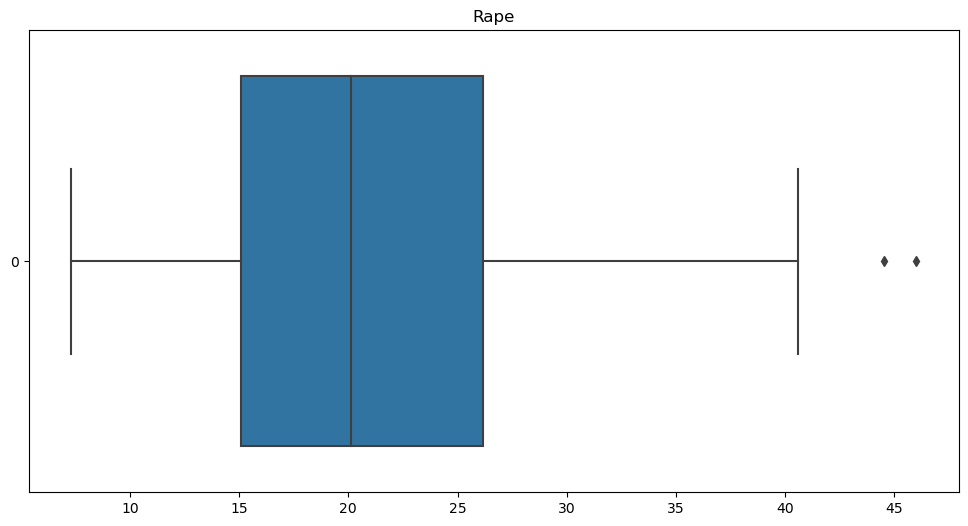

In [20]:
#Plotting box-plot for detecting outliers
for feature in crime_data1.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(crime_data1[feature],orient="h")
    plt.title(feature)
    plt.show()

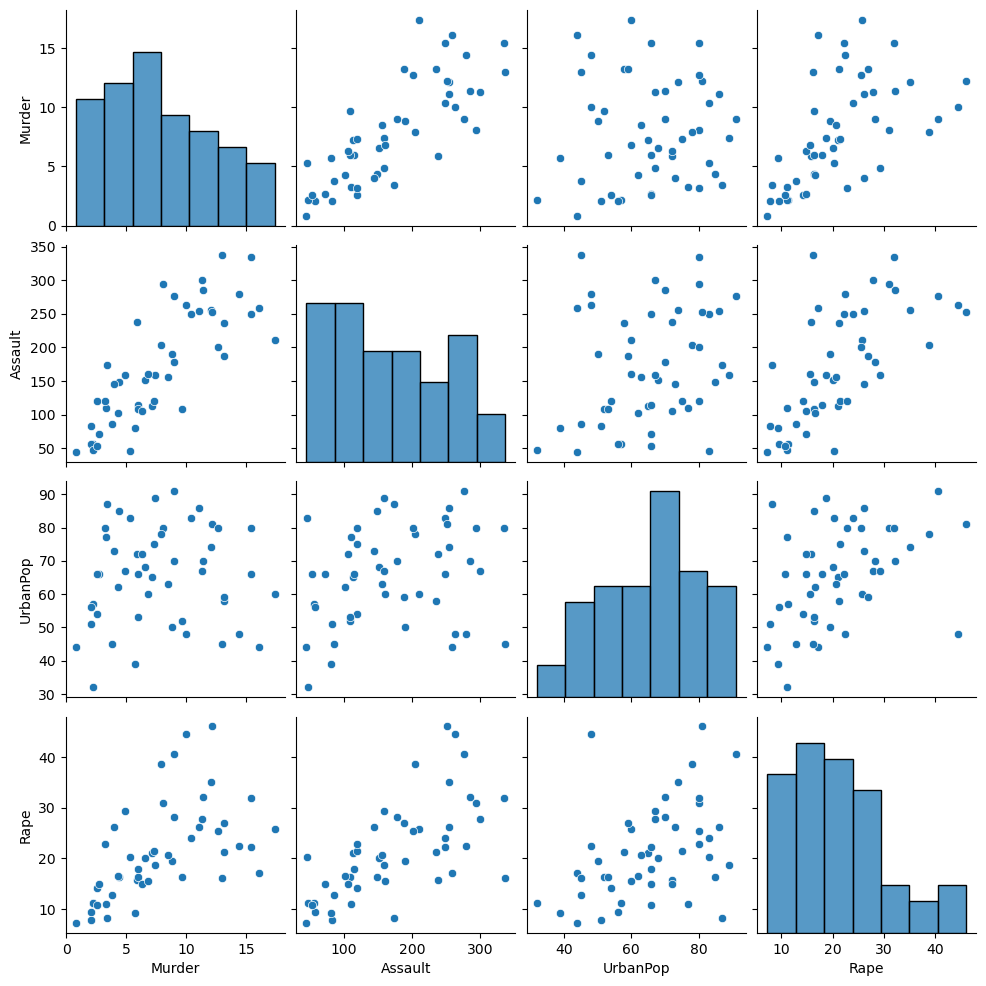

In [21]:
sns.pairplot(crime_data1)

In [22]:
crime_data1.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [24]:
#Pre-Processing the data
from sklearn.preprocessing import StandardScaler
crime_norm = pd.DataFrame(StandardScaler().fit_transform(crime_data1))
crime_norm

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


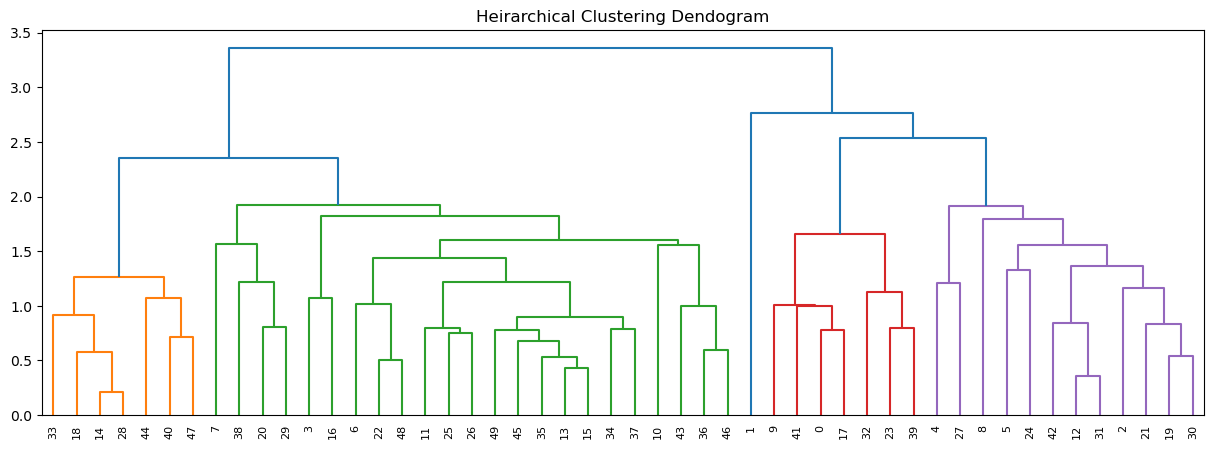

In [25]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
z = linkage(crime_norm,method='average',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Heirarchical Clustering Dendogram")
sch.dendrogram(z)
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5,linkage='average',affinity='euclidean').fit(crime_norm)

cluster_labels = pd.Series(h_complete.labels_)
cluster_labels

crime_norm_clust = crime_data.copy()
crime_norm_clust["clust"] = cluster_labels
crime_norm_clust

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [35]:
crime_norm_clust.groupby('clust').mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,5.530435,129.434783,68.913043,17.786957
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714
4,2.700000,65.142857,46.285714,9.885714


In [36]:
crime_norm_clust[(crime_norm_clust.clust==0)]

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
22,Minnesota,2.7,72,66,14.9,0


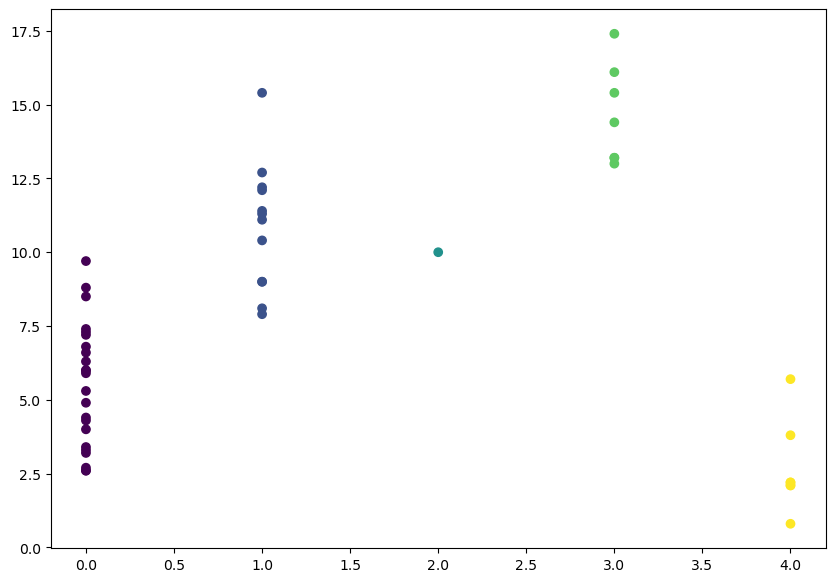

In [37]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_norm_clust['clust'],crime_norm_clust['Murder'], c=cluster_labels)

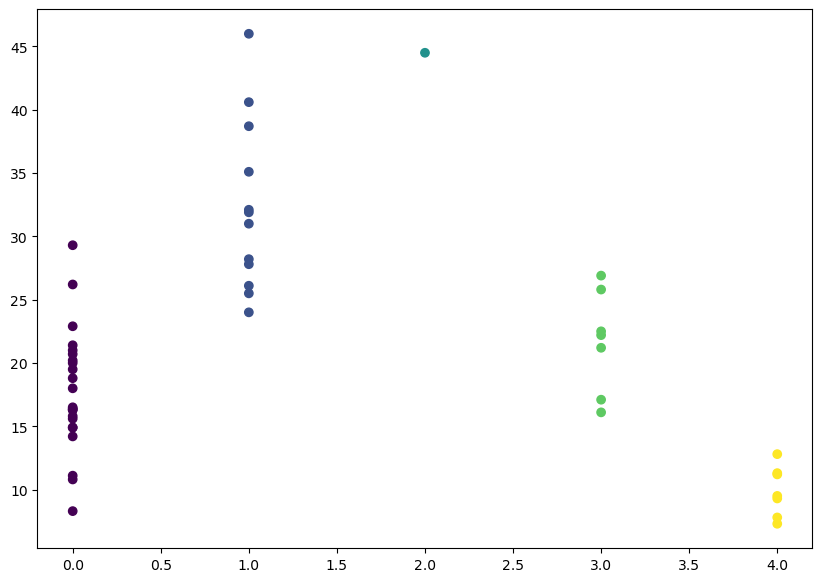

In [41]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_norm_clust['clust'],crime_norm_clust['Rape'], c=cluster_labels)

# K-Means

In [44]:
crime_data.head(3)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [45]:
crime_data1.head(3)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0


In [43]:
crime_norm.head(3)

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466


Text(0, 0.5, 'WCSS')

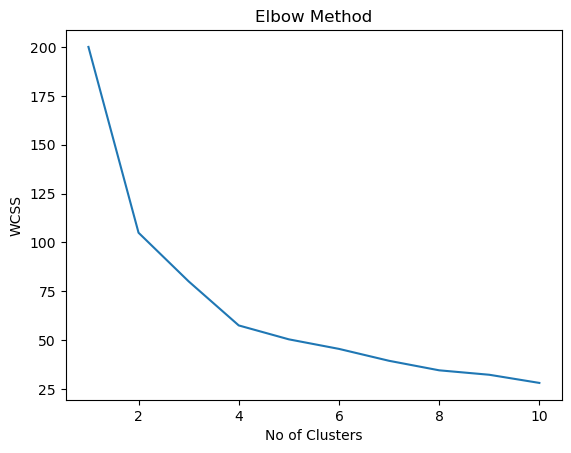

In [46]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")

In [47]:
#taking k = 4 and building cluster algorithm
clf4 = KMeans(n_clusters=4)
y_kmeans4 = clf4.fit_predict(crime_norm)

In [48]:
clf4.labels_

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 0, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [49]:
y_kmeans4

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 0, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [50]:
clf4.cluster_centers_

array([[ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [51]:
clf4.inertia_

57.55425863091105

In [52]:
kmeans4_clust = pd.Series(y_kmeans4)
crime_norm_clust_kmeans = crime_data.copy()
crime_norm_clust_kmeans["clust4"] = kmeans4_clust
crime_norm_clust_kmeans

,States,Murder,Assault,UrbanPop,Rape,clust4
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


In [53]:
crime_norm_clust_kmeans.groupby('clust4').mean()

,Murder,Assault,UrbanPop,Rape
clust4,,,,
0,10.815385,257.384615,76.000000,33.192308
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,5.656250,138.875000,73.875000,18.781250


In [54]:
crime_norm_clust_kmeans[(crime_norm_clust_kmeans.clust4==2)]

,States,Murder,Assault,UrbanPop,Rape,clust4
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


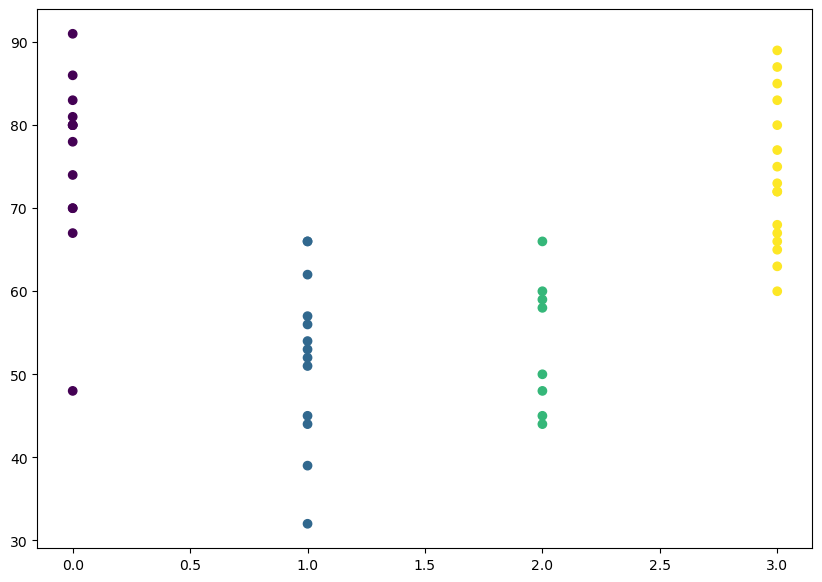

In [55]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_norm_clust_kmeans['clust4'],crime_norm_clust_kmeans['UrbanPop'], c=clf4.labels_)

Text(0.5, 1.0, 'Clusters using KMeans')

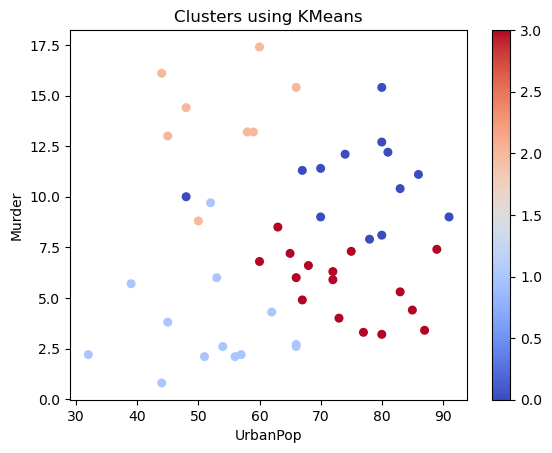

In [57]:
crime_norm_clust_kmeans.plot(x="UrbanPop",y ="Murder",c=clf4.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [56]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.08569526137275,
 57.55425863091105,
 50.4395137158558,
 45.55951438861751,
 39.46743710656854,
 34.6005931568525,
 32.32690076746594,
 28.151242224767014]

# DBSCAN

In [63]:
x = StandardScaler().fit_transform(crime_data1)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [64]:
from sklearn.neighbors import NearestNeighbors

In [65]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(x)
distances , indices = nbrs.kneighbors(x)

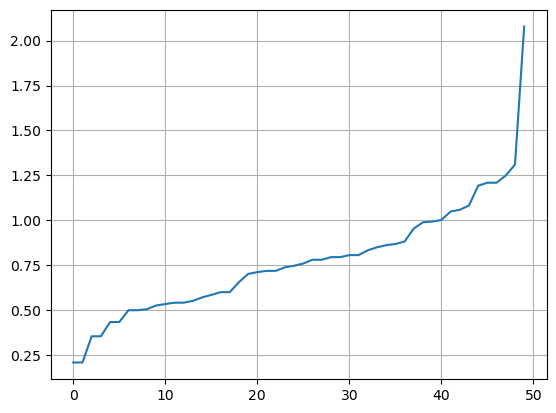

In [66]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)


In [67]:
from sklearn.cluster import DBSCAN

In [68]:
dbscan = DBSCAN(eps=1.25,min_samples=4)
dbscan.fit(x)

DBSCAN(eps=1.25, min_samples=4)

In [69]:
dbscan.labels_

array([ 0, -1,  1,  1, -1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [70]:
clust_dbscan = pd.Series(dbscan.labels_)
crime_norm_clust_dbscan = crime_data.copy()
crime_norm_clust_dbscan["clust(1.25)"] = clust_dbscan
crime_norm_clust_dbscan

,States,Murder,Assault,UrbanPop,Rape,clust(1.25)
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [71]:
crime_norm_clust_dbscan.groupby('clust(1.25)').mean()

,Murder,Assault,UrbanPop,Rape
clust(1.25),,,,
-1,11.650000,281.500000,75.000000,40.750000
0,14.671429,251.285714,54.285714,21.685714
1,6.156410,144.948718,66.589744,19.148718


In [72]:
dl = dbscan.labels_

In [74]:
import sklearn
sklearn.metrics.silhouette_score(x,dl)

0.25499695350718327

In [77]:
dbscan1 = DBSCAN(eps=1,min_samples=4)
dbscan1.fit(x)

DBSCAN(eps=1, min_samples=4)

In [78]:
dbscan1.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [79]:
clust_dbscan1 = pd.Series(dbscan1.labels_)
crime_norm_clust_dbscan["clust(1)"] = clust_dbscan1
crime_norm_clust_dbscan

,States,Murder,Assault,UrbanPop,Rape,clust(1.25),clust(1)
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,-1,-1
2,Arizona,8.1,294,80,31.0,1,-1
3,Arkansas,8.8,190,50,19.5,1,-1
4,California,9.0,276,91,40.6,-1,-1
5,Colorado,7.9,204,78,38.7,1,-1
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,1,-1
8,Florida,15.4,335,80,31.9,-1,-1
9,Georgia,17.4,211,60,25.8,0,-1


In [80]:
crime_norm_clust_dbscan.groupby('clust(1)').mean()

,Murder,Assault,UrbanPop,Rape,clust(1.25)
clust(1),,,,,
-1,11.005556,247.166667,70.666667,28.766667,0.388889
0,14.050000,238.000000,57.750000,23.200000,0.000000
1,4.825000,112.035714,63.357143,16.107143,1.000000


In [81]:
dl_1 = dbscan1.labels_

In [82]:
sklearn.metrics.silhouette_score(x,dl_1)

0.2051154919322

In [83]:

from sklearn.preprocessing import MinMaxScaler

y = MinMaxScaler().fit_transform(crime_data1)
y

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [178]:
dbscan2 = DBSCAN(eps=0.5,min_samples=8)
dbscan2.fit(y)

DBSCAN(min_samples=8)

In [179]:
dbscan2.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [180]:
clust_dbscan2 = pd.Series(dbscan2.labels_)
crime_norm_clust_dbscan_minmax = crime_data.copy()
crime_norm_clust_dbscan_minmax["clust"] = clust_dbscan2
crime_norm_clust_dbscan_minmax

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [181]:
dl2 = dbscan2.labels_

In [182]:
crime_norm_clust_dbscan_minmax.groupby('clust').mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
-1,10.000000,263.000000,48.000000,44.500000
0,7.742857,168.877551,65.897959,20.757143


In [183]:
sklearn.metrics.silhouette_score(y,dl2)

0.21033337025958487